<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

from nipy.core.api import Image
from nipy import load_image, save_image

from nipy.algorithms.resample import resample_img2img   # NOTE: manually editted nipy.algorithms.statistics.rft.py to import factorial from scipy.special

from boldli import ImageManipulatingLibrary as mil

%matplotlib inline                  

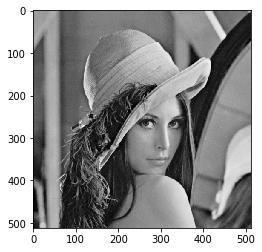

In [4]:
# Load image in grayscale
fn = "Lenna.png"
img = cv2.imread(fn,0)

# Display the image
plt.figure()
plt.imshow(img, cmap='gray')

In [48]:
def generateBlur(img, x, y, diameter=50, intensity=1.0):
    
    # Generate the 2D Gaussian distribution - CODE NOT BY ME REFACTOR BEFORE COMMIT
    gridX, gridY = np.meshgrid(np.linspace(-1,1,diameter), np.linspace(-1,1,diameter))
    grid = np.sqrt(gridX*gridX+gridY*gridY)
    sigma = .5
    blur = intensity * np.exp(-((grid)**2/(2.0*sigma**2)))
    
    # Set up padding
    lpad = int(np.round(x - (diameter/2.0)))
    rpad = int(np.round(img.shape[0] - lpad - (diameter)))
    upad = int(np.round(y - (diameter/2.0)))
    
    # Create a blank, image sized canvas
    newImg = np.zeros(img.shape)
    
    # Pad blur left and right
    for row in range(len(blur)):
        newImg[row+upad] = np.pad(blur[row], (lpad, rpad), 'constant', constant_values=(0.0, 0.0))
    
#     # Plot the blur
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    plt.imshow(newImg)
    
    return newImg

In [49]:
def addImages(img1, img2):
    newImg = np.add(img1, img2)
    
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    plt.imshow(newImg)
    
    return newImg

In [57]:
def saveImage(img, fn):
    cv2.imwrite(fn, img)

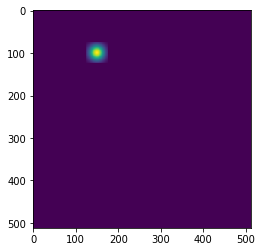

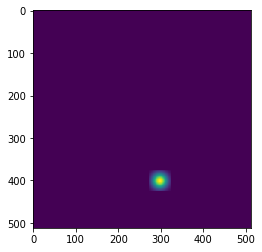

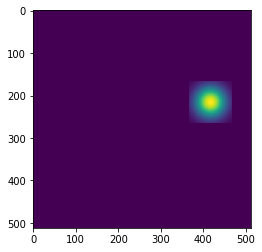

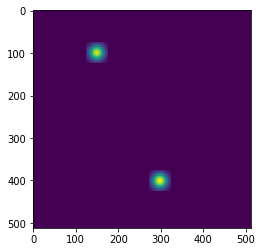

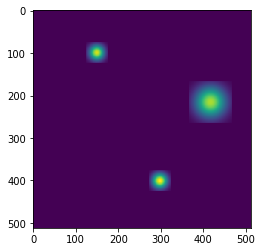

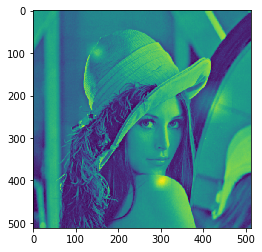

In [61]:
spots = generateBlur(img, 150, 100, intensity=75)
spots2 = generateBlur(img, 298, 401, intensity=80)
spots3 = generateBlur(img, 417, 216, diameter=100, intensity=70)

spotsAll = addImages(spots, spots2)
spotsAll = addImages(spots3, spotsAll)

lenaSpots = addImages(img, spotsAll)

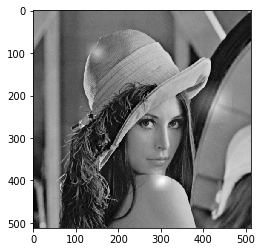

In [63]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
plt.imshow(lenaSpots, cmap="gray")

In [4]:
import SimpleITK as sitk
import numpy as np
import math

In [19]:
dims = 3
point = (1., 0., 0.)

print("Affine Transform")
affineTransform = sitk.AffineTransform(dims)

print(affineTransform.GetParameters())
print(affineTransform.GetFixedParameters())

Affine Transform
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)


In [20]:
xdeg = 90
ydeg = 0
zdeg = 0

xrad = math.radians(-xdeg)
yrad = math.radians(-ydeg)
zrad = math.radians(-zdeg)

zmatrix = np.array([[1., 0., 0.],
                    [0., np.cos(zrad), -np.sin(zrad)],
                    [0., np.sin(zrad), np.cos(zrad)]])
xmatrix = np.array([[np.cos(xrad), 0., np.sin(xrad)],
                    [0., 1., 0.],
                    [-np.sin(xrad), 0., np.cos(xrad)]])
ymatrix = np.array([[np.cos(yrad), -np.sin(yrad), 0.],
                    [np.sin(yrad), np.cos(yrad), 0.],
                    [0., 0., 1.]])

# Checked that order doesn't matter
matrix = zmatrix.dot(xmatrix.dot(ymatrix))
# print(zmatrix.dot(ymatrix.dot(xmatrix)))
# print(xmatrix.dot(ymatrix.dot(zmatrix)))
# print(xmatrix.dot(zmatrix.dot(ymatrix)))
# print(ymatrix.dot(xmatrix.dot(zmatrix)))
# print(ymatrix.dot(zmatrix.dot(xmatrix)))

affineTransform.SetMatrix(matrix.ravel())
print(affineTransform.GetParameters())
print(affineTransform.GetFixedParameters())

(6.123233995736766e-17, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 6.123233995736766e-17, 0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)


In [21]:
print(affineTransform.TransformPoint(point))

(6.123233995736766e-17, 0.0, 1.0)


In [23]:
affineTransform.WriteTransform("test.mat")

In [24]:
newTransform = sitk.ReadTransform("test.mat")

In [25]:
print(newTransform.GetParameters())
print(newTransform.GetFixedParameters())

(6.123233995736766e-17, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 6.123233995736766e-17, 0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)


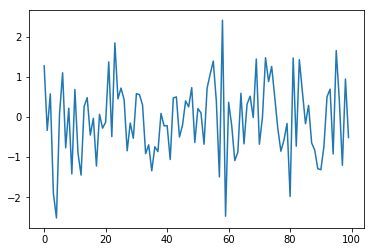

In [39]:
# Testing BOLD signal generation
f0 = 0.04 # Hz
n = 100
x = list(range(n))
y = [np.cos(2*math.pi*i*f0) for i in x]
amplitude = np.random.random(n)
offset = np.random.randn(n)
plt.plot(x, amplitude*y+offset)

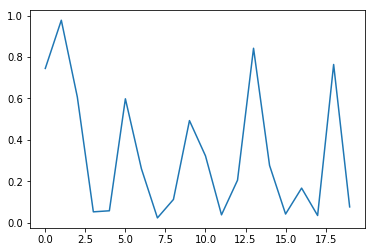

In [36]:
plt.plot(np.random.random(20))

In [28]:
math.pi

3.141592653589793

In [18]:
# Images to check
structBaseFn = "./mni_icbm152_lin_nifti/icbm_avg_152_t1_tal_lin.nii"
structMaskFn = "./mni_icbm152_lin_nifti/icbm_avg_152_t1_tal_lin_mask.nii"
maskedVolFn = "masked_base_volume.nii.gz"
roi3Fn = "test_roi_again.nii.gz"

fns = [structBaseFn, structMaskFn, maskedVolFn, roi3Fn]

for fn in fns:
    img = load_image(fn)
    print(fn)
    print(img.get_data().shape)
    print(img.coordmap)

In [4]:
from nipy.core.api import CoordinateSystem, AffineTransform

coord_names = ('talairach-x=L->R', 'talairach-y=P->A', 'talairach-z=I->S')
name = 'talairach'
coordmap = AffineTransform(CoordinateSystem('ijk', name='voxels'),
                           CoordinateSystem('xyz', name='talairach'), 
                           img.coordmap.affine)
img = Image(img.get_data(), coordmap)

In [7]:
img

Image(
  data=array([[[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]],
       
              [[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]],
       
              ...,
       
              [[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]],
       
              [[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]]], dtype=float32),
  coordmap=AffineTransform(
            function_domain=CoordinateSystem(coord_names=('i', 'j', 'k'), name='voxels', coord_dtype=float64),
            function_range=CoordinateSystem(coord_names=('x', 'y', 'z'), name='talairach', coo

In [29]:
save_image(img, "test_roi_again.nii.gz")

/home/jenna/anaconda3/lib/python3.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)
/home/jenna/anaconda3/lib/python3.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy; output names of "x", "y", "z" will raise an error.  Please use canonical output names from nipy.core.reference.spaces
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


Image(
  data=array([[[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]],
       
              [[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]],
       
              ...,
       
              [[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]],
       
              [[0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.],
               ...,
               [0., 0., ..., 0., 0.],
               [0., 0., ..., 0., 0.]]], dtype=float32),
  coordmap=AffineTransform(
            function_domain=CoordinateSystem(coord_names=('i', 'j', 'k'), name='voxels', coord_dtype=float64),
            function_range=CoordinateSystem(coord_names=('x', 'y', 'z'), name='talairach', coo

In [20]:
structImg = load_image(structBaseFn)
roiImg = load_image(roi3Fn)
target_dims = structImg.get_data().shape
print(roiImg.get_data().shape)

newRoiImg = resample_img2img(roiImg, structImg, order=0)
print(newRoiImg.get_data().shape)
print(newRoiImg.coordmap)

(91, 109, 91)
(181, 217, 181)
AffineTransform(
   function_domain=CoordinateSystem(coord_names=('i', 'j', 'k'), name='voxels', coord_dtype=float64),
   function_range=CoordinateSystem(coord_names=('talairach-x=L->R', 'talairach-y=P->A', 'talairach-z=I->S'), name='talairach', coord_dtype=float64),
   affine=array([[   1.,    0.,    0.,  -90.],
                 [   0.,    1.,    0., -126.],
                 [   0.,    0.,    1.,  -72.],
                 [   0.,    0.,    0.,    1.]])
)


# Sandbox for adding noise in k-space

In [133]:
import cv2                         # Installed in opencv

##
# Generate a single 3D Gaussian distribution at a 
# specific location in the image
#
# @param img The image as a numpy array
# @param intensity Float value to scale the intensity of the distribution
#
# @returns newImg The distribution located at (x, y, z) in a blank image
def generateGaussianShapedNoise(imgshape, intensity=1.0):
    
    # Center of the image
    x = imgshape[1]
    y = imgshape[0]
    z = imgshape[2]
    
    # Generate the 3D Gaussian distribution for modulating the uniform noise
    gridX, gridY, gridZ = np.meshgrid(np.linspace(-1,1,x), 
                                      np.linspace(-1,1,y),
                                      np.linspace(-1,1,z))

    grid = np.sqrt(gridX*gridX+gridY*gridY+gridZ*gridZ)
    sigma = .5
    blur = intensity * np.exp(-((grid)**2/(2.0*sigma**2)))
    
    # Uniform distribution
    uni = np.random.uniform(size=(x, y, z))
    
    # Modulate the uniform distribution by the Gaussian distribution
    noise = np.multiply(blur, uni)

    return noise

##
# Generate a single 3D Gaussian distribution at a 
# specific location in the image
#
# @param img The image as a numpy array
# @param intensity Float value to scale the intensity of the distribution
#
# @returns newImg The distribution located at (x, y, z) in a blank image
def generateGaussianNoise(imgshape, intensity=1.0):
    
    # Center of the image
    x = imgshape[0]
    y = imgshape[1]
    z = imgshape[2]
    
    # Generate Gaussian noise
    noise = np.random.standard_normal(size=(x, y, z))
    
    # Amplify the noise as needed
    noise *= intensity
    
    return noise

##
# Generate a single 3D Gaussian distribution at a 
# specific location in the image
#
# @param img The image as a numpy array
# @param intensity Float value to scale the intensity of the distribution
#
# @returns newImg The distribution located at (x, y, z) in a blank image
def generateComplexGaussianNoise(imgshape, intensity=1.0):
    
    # Center of the image
    x = imgshape[0]
    y = imgshape[1]
    z = imgshape[2]
    
    # Generate Gaussian noise
    noise = np.squeeze(np.random.standard_normal(size=(x, y, z, 2)).view(np.complex128))
    print(noise.shape)
    
    # Amplify the noise as needed
    noise *= intensity
    
    return noise


##
# Additively combine 2 images
#
# @param img1 The first image as a numpy array
# @param img2 The second image as a numpy array
#
# @returns newImg The combination of img1 and img2
def addImages(img1, img2):
    newImg = np.add(img1, img2)
    return newImg

##
# Perform the fast Fourier transform on an image and return the magnitude and phase images
#
# @param img The image as a numpy array
#
# @returns magImg The magnitude of the image in k-space
# @returns phaseImg The phase image of the image in k-space
def volumeFFT(img):
    # Perform the FFT on the image
    kImg = np.fft.fftn(img)
    
    # Use FFT shift to center the spectrum
    kImgShifted = np.fft.fftshift(kImg)
    print(np.max(kImgShifted), np.min(kImgShifted))
    
    # Extract the magnitude image
    magImg = np.abs(kImgShifted)
    
    # Extract the phase image
    phaseImg = np.angle(kImgShifted)
    
    return magImg, phaseImg, kImgShifted

##
# Convert magnitude and phase images back to a physical space image
#
# @param magImg The magnitude image in k-space as a numpy array
# @param phaseImg The phase image in k-space as a numpy array
#
# @return img The physical space image
def volumeIFFT(ampImg, angleImg):
    # Combine the magnitude and phase images
    comboImg = np.multiply(ampImg, np.exp(1j * angleImg))
    
    # Unshift the combined image
    comboImg = np.fft.ifftshift(comboImg)
    
    # Perform the IFFT
    img = np.fft.ifftn(comboImg)
    
    return img
    

In [131]:
# Images to check
maskedVolFn = "masked_base_volume.nii.gz"

img = load_image(maskedVolFn)

imgData = img.get_data()
print(np.max(imgData), np.min(imgData))
imgData *= (1000.0/np.amax(imgData))
print(np.max(imgData), np.min(imgData))

# Perform the FFT
magImg, phaseImg, kspace = volumeFFT(imgData)
print(np.max(magImg), np.min(magImg))
print(np.max(phaseImg), np.min(phaseImg))
print(magImg.shape, phaseImg.shape)

# Generate the Gaussian noise for both k-space images
magNoise = generateGaussianNoise(magImg.shape, intensity=3.0)
phaseNoise = generateGaussianNoise(phaseImg.shape, intensity=0.5)
print(magNoise.shape, phaseNoise.shape)

# Add the noise to the magnitude and phase images
magImgNoisy = addImages(magImg, magNoise)
# phaseImgNoisy = addImages(phaseImg, phaseNoise)
print(np.max(magImgNoisy), np.min(magImgNoisy))
# print(np.max(phaseImgNoisy), np.min(phaseImgNoisy))

# Perform the inverse FFT using the noisy magnitude and phase images
noisyImg = volumeIFFT(magImgNoisy, phaseImg)
print(np.max(noisyImg), np.min(noisyImg))

355666.75 0.0
1000.0 0.0
(1348786067.699867+5.2619725465774536e-08j) (-697055605.9330887+186950324.17141998j)
1348786067.699867 14.124475431742171
3.141591467422649 -3.1415914674226615
(181, 217, 181) (181, 217, 181)
(181, 217, 181, 1)
(181, 217, 181) (181, 217, 181)
1348786063.2699761 16.949943934752902
(999.9999284019846+0.00019715468596359642j) (-0.004415404425565793-0.00013146987369822049j)


In [146]:
##
# Convert magnitude and phase images back to a physical space image
#
# @param kImg The complex k-space image
#
# @return img The physical space image
def volumeIFFTAndClean(kImg):
    
    # Unshift the combined image
    kImg = np.fft.ifftshift(kImg)
    
    # Perform the IFFT
    img = np.fft.ifftn(kImg)
    
    img = np.real(img)
    img *= (1000.0/np.max(img))
    img = np.around(img, 8)
    img[img < 0.0] = 0
    img[img > 1000.0] = 1000.0
    
    return img

# Generate complex Gaussian noise
noise = generateComplexGaussianNoise(kspace.shape)
print(np.max(noise), np.min(noise))

# Add complex Gaussian noise to the k-space image
noisyKspace = addImages(kspace, noise)

# Convert back to physical space
noisyImg = volumeIFFT(noisyKspace)

print(np.max(noisyImg), np.min(noisyImg))

(181, 217, 181)
(5.437406094322074-0.8387323235333692j) (-4.994407822927483-0.19627455148200587j)
1000.0 0.0


In [147]:
kspace_to_save = Image(noisyImg, coordmap)

_ = save_image(kspace_to_save, "test_kspace.nii.gz")